For the water.csv dataset from the folder classification. Target variable - Potability.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


target_variable = 'Potability'
data_raw = pd.read_csv('../content/water.csv')
data_raw

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1,7.424764,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
2,3.716080,129.422921,18630.057858,6.635246,332.759842,592.885359,15.180013,56.329076,4.500656,0
3,8.099124,224.236259,19909.541732,9.275884,318.740022,418.606213,16.868637,66.420093,3.055934,0
4,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
5,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3272,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3273,7.808856,193.553212,17329.802160,8.061362,340.356991,392.449580,19.903225,65.094659,2.798243,1
3274,9.419510,175.762646,33155.578218,7.350233,323.933136,432.044783,11.039070,69.845400,3.298875,1
3275,5.126763,230.603758,11983.869376,6.303357,341.411948,402.883113,11.168946,77.488213,4.708658,1


In [2]:
# Check for missing values
data_raw.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Build and evaluate a kNN classifier. Enter the value of ACC into the answer.

In [3]:
X = data_raw[data_raw.columns[:-1]]
y = data_raw[target_variable]

# Preparing sets of training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Scaling the data
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,

In [4]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.6439471007121058


Find the optimal value for the number of neighbours. Enter the obtained value into the answer.

Optimal value of neighbors:  11


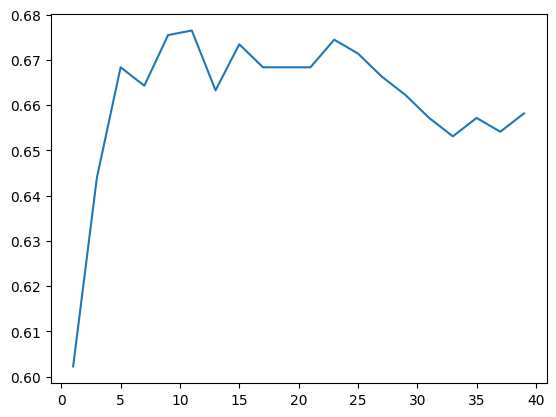

In [5]:
# Finding optimal number of neighbors
accuracy_rate = []
for k in range(1,40,2):
    classifier= KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train,y_train)
    y_pred= classifier.predict(X_test)
    score= accuracy_score(y_test,y_pred)
    accuracy_rate.append(score)

plt.plot(range(1,40,2), accuracy_rate, label="test")

# Obtaining the optimal number of neighbors
k= 2*accuracy_rate.index(max(accuracy_rate)) + 1 
print("Optimal value of neighbors: ", k)

Generate an image of the confusion matrix for the optimal number of neighbours.

In [6]:
knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
plt.savefig('../images/confusion_Matrix.png')
print("Confusion Matrix: \n", cm)

Confusion Matrix: 
 [[498  87]
 [231 167]]


<Figure size 640x480 with 0 Axes>

For the parameters ph=5, Hardness=200, Solids=2000, Chloramines=8, Sulfate=300, Conductivity=500, Organic_carbon=18, Trihalomethanes=70, Turbidity=4 answer whether the water is potable(class 1) or not. Write answer.

In [7]:
sample= [[5,200,2000,8,300,500,18,70,4]]
sample=scaler.fit_transform(sample)
pred= knn.predict(sample)
pred


array([0])